# Find relationships between trends

In [1]:
import jo_regress
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt

### Open anomalous fields

In [2]:
def open_anom(filename):
    ds = xr.open_mfdataset(f'/work5/stb/ERA5/anom-fields/{filename}_anom.nc', chunks={})
    return ds

In [5]:
#ssh,eke,u,v,sst_g are from GLORYS

sst = open_anom('sst')
tcc = open_anom('tcc')
mslp = open_anom('lcc')
u10 = open_anom('u10')
v10 = open_anom('v10')
lcc = open_anom('lcc')

sw = open_anom('sw')
lw = open_anom('lw')
sh = open_anom('sh')
lh = open_anom('lh')

In [6]:
ssh = open_anom('ssh')
u = open_anom('u')
v = open_anom('v')
eke = open_anom('eke')
sst_g = open_anom('sst_g')

In [11]:
sst

<xarray.Dataset> Size: 350MB
Dimensions:                  (latitude: 55, longitude: 69, time: 23011)
Coordinates:
  * latitude                 (latitude) float32 220B 31.0 30.75 ... 17.75 17.5
  * longitude                (longitude) float32 276B 262.0 262.2 ... 279.0
  * time                     (time) datetime64[ns] 184kB 1959-01-01 ... 2021-...
    dayofyear                (time) int64 184kB dask.array<chunksize=(23011,), meta=np.ndarray>
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float32 349MB dask.array<chunksize=(23011, 55, 69), meta=np.ndarray>

In [101]:
#ssh,eke,u,v,sst_g are from GLORYS

sst = xr.open_dataarray('/work5/stb/ERA5/anom-fields/sst_anom.nc', chunks={})
tcc = xr.open_dataarray('/work5/stb/ERA5/anom-fields/tcc_anom.nc', chunks={})
mslp = xr.open_dataarray('/work5/stb/ERA5/anom-fields/mslp_anom.nc', chunks={})
u10 = xr.open_dataarray('/work5/stb/ERA5/anom-fields/u10_anom.nc', chunks={})
v10 = xr.open_dataarray('/work5/stb/ERA5/anom-fields/v10_anom.nc', chunks={})
mask = xr.open_dataarray('/work5/stb/ERA5/mask.nc', chunks={})
lcc = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/lcc_anom.nc', chunks={})

sw = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/sw_anom.nc', chunks={})
lw = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/lw_anom.nc', chunks={})
sh = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/sh_anom.nc', chunks={})
lh = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/lh_anom.nc', chunks={})

ssh = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/ssh_anom.nc', chunks={})
u = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/u_anom.nc', chunks={})
v = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/v_anom.nc', chunks={})
eke = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/eke_anom.nc', chunks={})
sst_g = xr.open_dataarray('/work/Shanice.Bailey/ERA5/anom-fields/sst_g_anom.nc', chunks={})

### Open EOF/PC fields

In [7]:
def open_ds(filename):
    ds = xr.open_mfdataset(f'/work5/stb/MHW-gfdl/eofs/anom/{filename}_anom_*.nc', chunks={})
    return ds

In [8]:
sst_eof = open_ds('sst')
tcc_eof = open_ds('tcc')
mslp_eof = open_ds('mslp')
u10_eof = open_ds('u10')
v10_eof = open_ds('v10')
lcc_eof = open_ds('lcc')

sw_eof = open_ds('sw')
lw_eof = open_ds('lw')
sh_eof = open_ds('sh')
lh_eof = open_ds('lh')

In [9]:
sst_g_eof = open_ds('sst_g')
ssh_eof = open_ds('ssh')
u_eof = open_ds('u')
v_eof = open_ds('v')
eke_eof = open_ds('eke')

In [10]:
sst_eof.components

<xarray.DataArray 'components' (mode: 3, latitude: 55, longitude: 69)> Size: 91kB
dask.array<open_dataset-components, shape=(3, 55, 69), dtype=float64, chunksize=(3, 55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 17.5 17.75 18.0 18.25 ... 30.5 30.75 31.0
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * mode       (mode) int64 24B 1 2 3

### Project fields onto SST PC

In [62]:
def regression(da_a, da_b, dims='time'):
    """Code borrowed from Joe Clark"""
    a = (da_a - da_a.mean(dim=dims)) / da_a.std()
    #a = (sst_eof.scores[mode] - sst_eof.scores[mode].mean(dim=dims)) / sst_eof.scores[mode].std()
    b = da_b - da_b.mean(dim=dims)
    
    C = (a * b).sum(dim=dims) / (a**2).sum(dim=dims)

    return C

In [96]:
for i in var_titles:
    print(i)

TCC
LCC
MSLP
U10
V10
SW
LW
SH
LH
SSH
U
V
EKE


In [100]:
tcc

<xarray.Dataset> Size: 350MB
Dimensions:            (latitude: 55, longitude: 69, time: 23011)
Coordinates:
  * latitude           (latitude) float32 220B 31.0 30.75 30.5 ... 17.75 17.5
  * longitude          (longitude) float32 276B 262.0 262.2 ... 278.8 279.0
  * time               (time) datetime64[ns] 184kB 1959-01-01 ... 2021-12-31
    dayofyear          (time) int64 184kB dask.array<chunksize=(23011,), meta=np.ndarray>
Data variables:
    total_cloud_cover  (time, latitude, longitude) float32 349MB dask.array<chunksize=(23011, 55, 69), meta=np.ndarray>

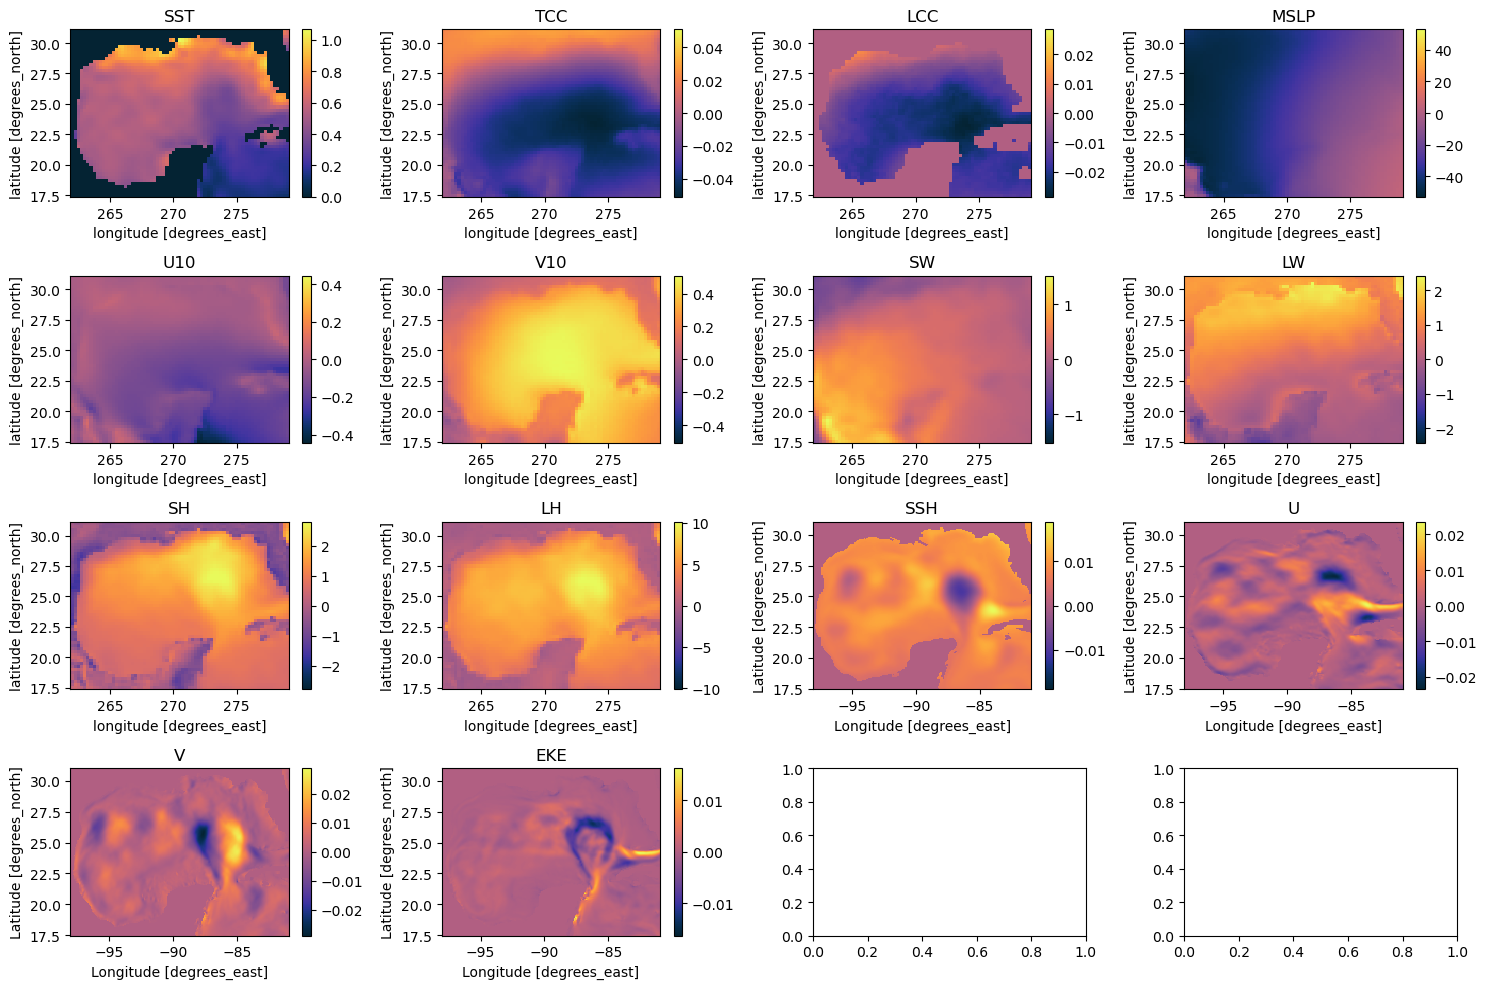

In [105]:
#fields = [tcc_eof, lcc_eof, mslp_eof, u10_eof, v10_eof, sw_eof, lw_eof, 
#          sh_eof, lh_eof, ssh_eof, u_eof, v_eof, eke_eof]
fields = [sst, tcc, lcc, mslp, u10, v10, sw, lw, 
          sh, lh, ssh, u, v, eke]
var_titles = ['SST', 'TCC', 'LCC', 'MSLP', 'U10', 'V10', 
              'SW', 'LW', 'SH', 'LH', 'SSH', 'U', 'V', 'EKE']

fig, ax = plt.subplots(4,4, figsize=(15,10))
ax = ax.ravel()
c = 0
for (i,j) in zip(fields, np.arange(0, len(fields)+1)):
    regression(da_a = sst_eof.scores[0], 
               da_b = i, 
               dims='time').plot(cmap = cmocean.cm.thermal, ax=ax[j])
    ax[j].set_title(f'{var_titles[j]}')
plt.tight_layout();